### №1

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()

In [3]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.711226005748496

### №2

In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, max_depth=12, random_state=42)
model.fit(X_train, y_train.values[:, 0])
y_pred_RFR = model.predict(X_test)
r2_score(y_test, y_pred_RFR)

0.87472606157312

### Вероятно модель RandomForestRegressor с задачей справляется лучше, так как ее результат ближе к 1, чем у модели LinearRegression.

### №3

In [7]:
model.feature_importances_.sum()

1.0

<BarContainer object of 13 artists>

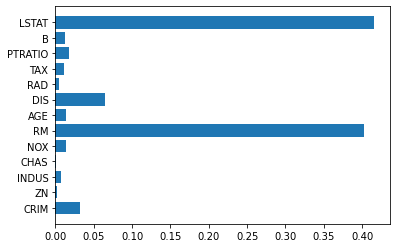

In [8]:
from matplotlib import pyplot as plt
plt.barh(boston["feature_names"], model.feature_importances_)

### №4

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [10]:
DATASET_PATH = './/creditcard.csv'
df = pd.read_csv(DATASET_PATH, sep=',')

In [18]:
df['Amount'].value_counts(normalize=True)

1.00      0.048061
1.98      0.021221
0.89      0.017106
9.99      0.016667
15.00     0.011517
            ...   
438.10    0.000004
152.29    0.000004
156.45    0.000004
724.44    0.000004
102.77    0.000004
Name: Amount, Length: 32767, dtype: float64

In [19]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [20]:
pd.options.display.max_columns = 100

In [23]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [25]:
y = df['Class']
X = df.drop('Class', axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


In [36]:
parameters = [{'n_estimators': [10, 15],'max_features': np.arange(3, 5),'max_depth': np.arange(4, 7)}]
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),param_grid=parameters,scoring='roc_auc',cv=3,)

In [37]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [38]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [39]:
clf = RandomForestClassifier(max_depth=6, max_features=3, n_estimators=15)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [50]:
print(y_pred[:10])

[[9.99235114e-01 7.64886165e-04]
 [9.99164606e-01 8.35393657e-04]
 [9.99729798e-01 2.70201966e-04]
 [9.99729798e-01 2.70201966e-04]
 [9.99729798e-01 2.70201966e-04]
 [9.99729798e-01 2.70201966e-04]
 [9.99729798e-01 2.70201966e-04]
 [9.99729798e-01 2.70201966e-04]
 [9.99704550e-01 2.95449764e-04]
 [9.99729798e-01 2.70201966e-04]]


In [46]:
y_pred_proba = y_pred[:,1]

In [53]:
y_pred_proba = y_pred[:, 1]
print(y_pred_proba[:10])

[0.00076489 0.00083539 0.0002702  0.0002702  0.0002702  0.0002702
 0.0002702  0.0002702  0.00029545 0.0002702 ]


In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.9564874212391654